# <center> <font size=16, color='darkgreen'> Introduction to Gradient Descent and Back propagation </font>

## The Output of Neural Network Model

  - Recall that forward propagation feeds the hidden layers, and uses an activation function to give an output.

  - After Doing Forward propagation, we predict a value (the output layer) $\hat y$ (the predicted output).
  
  - Recall from our other machine Learning lectures, we use train set, so we have an **actual output**. After training the model, we evaluate it on the **test set**
  
Our questions now are:

   - **How do we evaluate our network model?**
   - **How do we improve our model??**

We will use the neural networks terms herceforth, so:

  - **How do we update the weights (and biases) to get a better prediction?**
  
To solve these questions, we use the same techniques we already learned in ML lectures:

   1. Compare the estimate outputs of the neural network model with the actual values of the target variable (Using the training data set).
   2. Using a loss function to evaluate the model. (We will use the simplest loss function MSE in a regression problem) (other loss functions for classification will be shown in later lectures)
   3. Using a loss function allows us to monitor the neural network performance.


## The Loss  Function


#### $$\textbf{MSE} = \frac{1}{n}\sum_{i=1}^{n}\bigg( \hat y - y_i\bigg)^2$$

### The Derivative Function
 
 - The derivative function of the previous function in case of n=2 is:
 
 #### $$\textbf{MSE_prime} = 2 \Big(\hat y - y_i \Big)$$
 
In words:

### $$\textbf{derivative error function} = 2 \times (\text{predicted} - \text{actual})$$


### Example Calculating the Error

In [1]:
##=========================================================
##        Relu Function and simple net prediction function
##=========================================================

def relu(input):
    '''
    The ReLU acctivation function
    '''
    output = max(0, input)
    return(output)

def one_hidden_layer_network(input_data, weights):
    node_0_input = (input_data * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    node_1_input = (input_data * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    hidden_layer_values = np.array([node_0_output, node_1_output])
    input_to_final_layer = (hidden_layer_values * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    return(model_output)

In [2]:
##=========================================================
##    Apply Adjusting the weight
##=========================================================

import numpy as np

## The Input Layer Data
input_layer = np.array([0, 3])

## The Weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }
## The Actual Target Data point
target_actual = 3

## Predict the output of the neural network model
model_output_0 = one_hidden_layer_network(input_layer, weights_0)

# Calculate error 
error_0 = model_output_0 - target_actual

# Adjust the weights to make perfect prediction (3): 

weights_1 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [-1, 1]
            }

# Make prediction using new weights
model_output_1 = one_hidden_layer_network(input_layer , weights_1)

# Calculate error again
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)


6
0


### Calculate the Errors with different weights

In [3]:
## Practice Two: 
## Here is the data

input_data = [np.array([0, 3]), np.array([1, 2]),
              np.array([-1, -2]), np.array([4, 0])]

target_actuals = np.array([1, 3, 5, 7])


weights_0 = {'node_0': np.array([2, 1]),
             'node_1': np.array([1, 2]), 
             'output': np.array([1, 1])}

weights_1 = {'node_0': np.array([2, 1]),
             'node_1': np.array([1. , 1.5]),
             'output': np.array([1. , 1.5])}

In [4]:
from sklearn.metrics import mean_squared_error

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(one_hidden_layer_network(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(one_hidden_layer_network(row, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)


Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


## Gradient Descent

  - In the previous example we were changing the weights manually, but how do we know what is the best weight?
  
  - Suppose in a simple neural network, with only **one weight**, and we want to figure out which value of weight gives us the minimum **loss function**. 
  
  - In figure below, it would be obvious for a calculus student to say that the minimum is the derivative of the slope equals zero. 

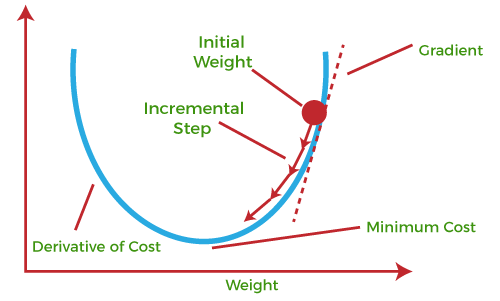

- However, a loss function is not that easy, it would be in n-dimensional space, and we can't figure that out by ourselves.  In this case, we won't take the derivative, but instead we use a **gradient descent** (I would like to simplify the term to be the derivatine in n-dimensional space) or an array of slopes is called **gradient**.


- We want to minimize the vector of slopes, hence the name **gradient descent**.

- The gradient will be calculated on many weights (thousands).


- You are going to hear the term **stochastic gradient descent**, which means we calaculate the **gradient descent** on a sample of data (not the whole data). This sample of data is called **batch**. 

### Gradient Descent Example

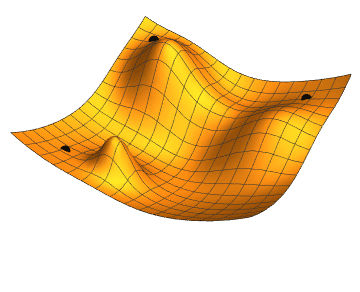

## How Gradient is Calculated: 

 - From the previous simple plot, we start at a random point, and we calculate the slope. 
 
-  We repeatedly find a slope capturing how your loss function changes as a weight changes. 

- We make a small change to the weight to get to a lower point. 

- We repeat this process until we are at the lowest point.

### The Slope:

- If the slope is positive, going opposite the slope means moving to lower numbers. This can be achieved by substracting the slope from the current weight. 

- But, there is one problem with this method, if we take a big step, we may miss the lowest point. Thus, instead of directly subtracting the slope:
    - we multiply the slope by a small number, called the **learning rate**.
    - Change the weight by the product of **learning rate times slope**. 
    
- Learning rates are frequently around 0.01. This ensures we take small steps, so we reliably move towards the optimal weights. But how do we find the relevant slope for each weight we need to update? 

- Working this out for yourself involves calculus, especially the application of the chain rule. 

## Gradient Descent in Practice:

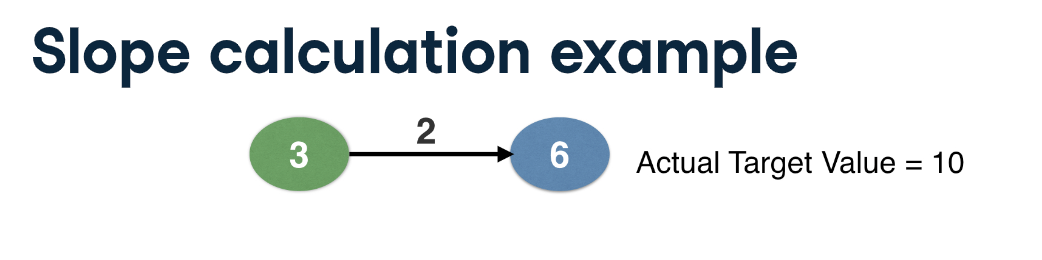

### Steps of calculating the Slope

- Weights feed from one node into another, and you always get the slope you need by multiplying three things:
    - First, the slope of the loss function with respect to the value at the node we feed into. 
    - Second, the value of the node that feeds into our weight.
    - Third, the slope of the activation function with respect to the value we feed into. 
   
   
### Example: 

- First, we start with the slope of the loss function with respect to the value of the node our weight feeds into.

    - In this case, that node is the model's prediction. The slope of loss function is **2 * (predicted value - actual value)**. 
    
- In our case, 2 times the error (2*error):
    - Here, from forward propagation:
        - Prediction was 6.
        - The actual target value is 10
        - The error is (6 - 10), which is (-4).

 
- Second, we multiply is the value at the node we are feeding from.
    - Here, that is 3.

- Finally, the slope of the activation function at the value we feed into (We don't use an activation function here).

- The result is:

      2 * (-4) * 3 = -24
      
### Improving the weight: 

 - We would now improve this weight by subtracting the learning rate times that slope, (-24). 
 
 - If the learning rate were (0.01), we would update this weight to be (2.24). 
 
       2 - ((0.01) * (-24)) = 2.24 
       
- That gives us a better model. And it would continue improving if we repeated this process. For multiple weights feeding to the output, we repeat this calculation separately for each weight. Then we update both weights simultaneously using their respective derivatives.

### Calcalating the Gradient Descent with Python

In [5]:
## Data
weights = np.array([0, 2, 1])
input_data = np.array([1, 2, 3])
target = 0

# Calculate the predictions:
preds = (weights * input_data).sum()

# Calculate the error
error = - target + preds

# Calculate the slope: slope
slope = 2 * input_data * error

# Print the Gradient Descent
print(slope)

[14 28 42]


### Improving the model by using the Learning Rate

In [6]:
##=========================================================
##        Improving Model Weights
##=========================================================

# Set the learning rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights
weights_updated = weights - (slope * learning_rate)

# Get updated predictions 
preds_updated = (weights_updated * input_data).sum()

# Calculate updated error
error_updated = preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)

7
5.04


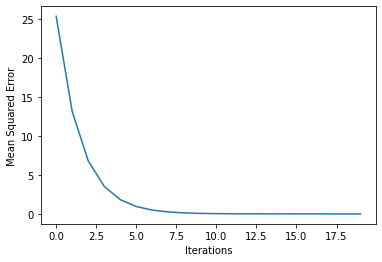

In [7]:
##=========================================================
##        Making multiple updates to weights
##=========================================================
import numpy as np
import matplotlib.pyplot as plt

## Defining  Functions to get the error and the slope
## and the mean squared error

def get_error(input_data, target, weights):
    """
    Function that calculates the error 
    """
    preds = (weights * input_data).sum()
    error = preds - target
    return(error)

def get_slope(input_data, target, weights):
    """
    Function that calculates the slope 
    """
    error = get_error(input_data, target, weights)
    slope = 2 * input_data * error
    return(slope)

def get_mse(input_data, target, weights):
    """
    Function that calculates the mean squared error (mse) 
    """
    errors = get_error(input_data, target, weights)
    mse = np.mean(errors**2)
    return(mse)

n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    
    slope = get_slope(input_data, target, weights)
    
    # Update the weights
    weights = weights - 0.01 * slope
    
    # Calculate mse with new weights
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

## BackPropagation

- Besides gradient descent technique that optimizes weights, another  technique called **back propagation** is used  to calculate the slopes we need to optimize more complex deep learning models.

- Just as forward propagation sends input data through the hidden layers and into the output layer, back propagation takes the error from the output layer and propagates it backward through the hidden layers, towards the input layer.


- It calculates the necessary slopes sequentially from the weights closest to the prediction, through the hidden layers, eventually back to the weights coming from the inputs. We then use these slopes to update our weights. 

- Typically, we are trying to estimate the slope of the loss function with respect to each weight in our network. So we always do forward propagation to make a prediction and calculate an error before we do back propagation.

### Back Propagation Example:

- For back-propagation, we go back one layer at a time, and each time we go back a layer, we'll use a formula for slopes.

- Every weight feeds from some input node into some output node. The three things we multiply to get the slope for that weight are:
    1. The value at the weights input node.
    2. The slope from plotting the loss function against that weight's output node.
    3. The slope of the activation function at the weight's output. 
    
- We know the value at the node feeding into this weight. Either it is in an input layer, in which case we have it from the data. Or that node is in a hidden layer, in which case we calculated its value when we did forward propagation. 

- The second item on this list is the slope of the loss function with respect to the output node. 

- We do backward propagation from the right side of our diagram to the left. 

- Finally we need the slope of the activation function at the node it feeds into.

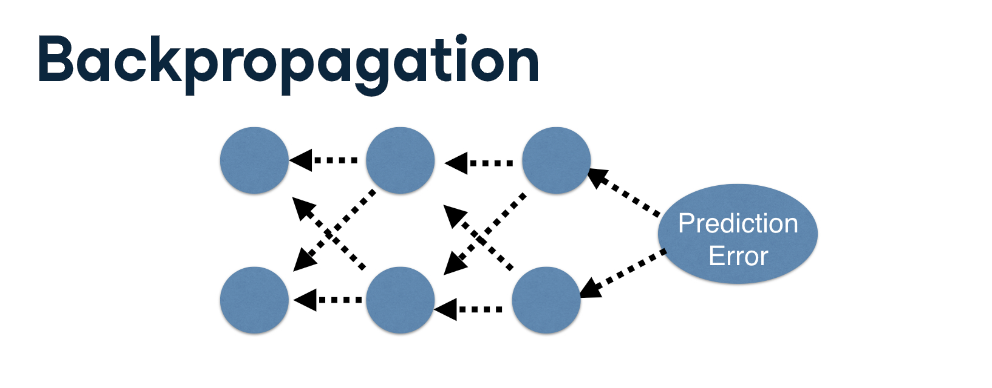

___

## Building a Real Neural Network Model that Uses Back Propagation method

In [8]:
##============================================================
##        Write the function that uses forward propagation
##        and back propagation to update weight using ReLU
##        activation function
##
##        """
##        Note:
##        ----
##        To Fully understand the following code, a math background of gradient descent
##        and back propagation derivatives
###       """
## ===============================================================

import numpy
import matplotlib.pyplot

def relu(sum_of_product):
    return max(0, sum_of_product)

def error(predicted, target):
    return numpy.power(predicted-target, 2)

def error_predicted_deriv(predicted, target):
    return 2*(predicted -target)

def relu_deriv(sum_of_product):
    return 1 if sum_of_product > 0 else 0

def sum_of_product_w_deriv(x):
    return x

def update_w(w, grad, learning_rate):
    return w - learning_rate*grad

## Train a neural Network using  Back Propagation

We are going to use back propagation for the next simple network.

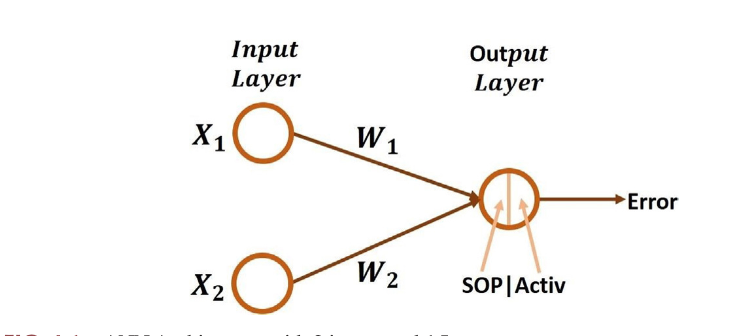

In [9]:
import matplotlib.pyplot as plt
import matplotlib
x1=0.1
x2=0.4

target = 0.7
learning_rate = 0.01

w1 = numpy.random.rand()
w2 = numpy.random.rand()

print("Initial W : ", w1, w2)

predicted_output = []
network_error = []
predicted_results = []
old_err = 0
for k in range(10000):
    # Forward Pass
    y = w1*x1 + w2*x2
    predicted = relu(y)
    predicted_results.append(predicted)
    err = error(predicted, target)
    
    predicted_output.append(predicted)
    network_error.append(err)

    # Backward Pass
    g1 = error_predicted_deriv(predicted, target)

    g2 = relu_deriv(y)
    
    g3w1 = sum_of_product_w_deriv(x1)
    g3w2 = sum_of_product_w_deriv(x2)
    
    gradw1 = g3w1*g2*g1
    gradw2 = g3w2*g2*g1

    w1 = update_w(w1, gradw1, learning_rate)
    w2 = update_w(w2, gradw2, learning_rate)


    #print(predicted)

Initial W :  0.3821405029260152 0.477446388622806


In [10]:
predicted_results[:11]

[0.22919260574172393,
 0.23079335088220207,
 0.23238865348920257,
 0.23397853206733932,
 0.23556300505831035,
 0.2371420908411121,
 0.23871580773225234,
 0.24028417398596266,
 0.24184720779441038,
 0.24340492728790938,
 0.2449573505351305]

In [11]:
predicted_results[-10:]

[0.6999999999999862,
 0.6999999999999862,
 0.6999999999999862,
 0.6999999999999862,
 0.6999999999999862,
 0.6999999999999862,
 0.6999999999999862,
 0.6999999999999862,
 0.6999999999999862,
 0.6999999999999862]

Text(0, 0.5, 'Error')

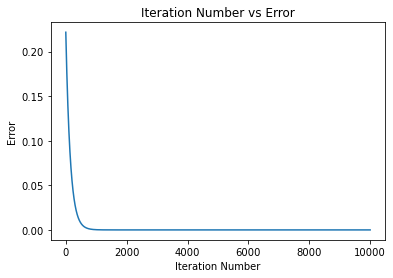

In [12]:
## Plot the Error Vs. The Iteration Number
matplotlib.pyplot.figure()
plt.plot(network_error)
plt.title("Iteration Number vs Error")
plt.xlabel("Iteration Number")
plt.ylabel("Error")

Text(0, 0.5, 'Prediction')

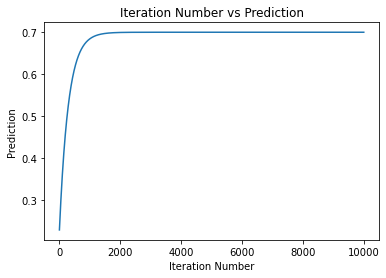

In [13]:
## Plot the Prediction Vs. The Iteration Number

plt.figure()
plt.plot(predicted_output)
plt.title("Iteration Number vs Prediction")
plt.xlabel("Iteration Number")
plt.ylabel("Prediction")

### Sources

url = https://www.javatpoint.com/gradient-descent-in-machine-learning

url2 = https://neptune.ai/blog/backpropagation-algorithm-in-neural-networks-guide

url3 = https://commons.wikimedia.org/wiki/File:Gradient_descent.gif